In [4]:
import numpy as np
import helper

In [5]:
setup_data = {
    'filename': 'Off_of_Newton_Exit_17.wav',
    'verbose': False
}

In [6]:
sync_samples, data_samples, framerate, nchannels = helper.open_wave(setup_data['filename'])
Time = helper.convert_to_time_scale(data_samples, framerate)

In [7]:
import matplotlib.pyplot as plt

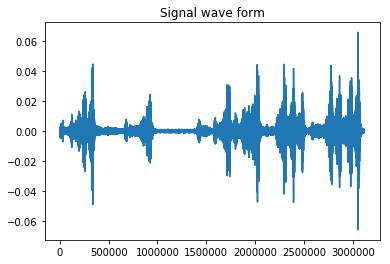

In [8]:
plt.figure(1)
plt.title('Signal wave form')
plt.plot(data_samples)
plt.show()

In [10]:
Tp = 0.250 # (s) pulse time
fc = 2590e6 # (Hz) Center Frequency (connected VCO Vtune to +5 for example)
N = helper.get_num_of_samples_per_pulse(Tp, framerate)
sif = helper.chunk_signal_by_time(data_samples, int(N))

In [11]:
# Substract the average DC term here
sif = sif - helper.obtain_dc_term(data_samples)

In [14]:
zpad = int(8 * N / 2)

In [15]:
res = np.fft.ifft(sif, zpad, 1)

In [16]:
# Doppler vs time plot
v = helper.dbv(res)

In [17]:
# Chop it half (ifft)
v = v[:, 1:v.shape[1]//2]

In [18]:
mmax = np.max(v)

In [20]:
# Calculate wavelength, velocity and time axis scale
delta_f = np.linspace(0, framerate/2, v.shape[1])

C = 3e8 # (m/s)

lambda_ = C/fc

velocity = delta_f * lambda_ /2

time = np.linspace(1, Tp * v.shape[0], v.shape[0])

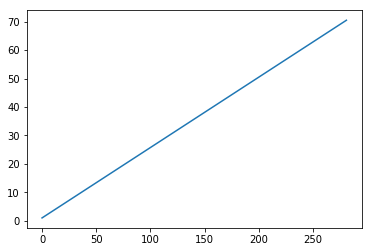

In [21]:
plt.plot(time)

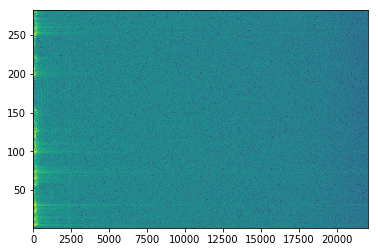

In [24]:
# x, y axis should be time and velocity, yet to figure out how to use imshow with extent properly
plt.imshow(v - mmax, extent=[0, v.shape[1], 1, v.shape[0]], aspect='auto')